In [1]:
# RAN ON 12/14/2015

# import requests
# import sqlite3 as lite
# import time
# import datetime
# from dateutil.parser import parse
# import collections


# con = lite.connect('citi_bike.db')
# cur = con.cursor()

# starttime = time.time()
# counter = 0

# while counter < 60:
#     r = requests.get('http://www.citibikenyc.com/stations/json')
#     exec_time = parse(r.json()['executionTime'])
#     exec_time = str((exec_time - datetime.datetime(1970,1,1)).total_seconds())
#     with con:
#         cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time,))
#     id_bikes = collections.defaultdict(int)
#     for station in r.json()['stationBeanList']:
#         id_bikes[station['id']] = station['availableBikes']
#     with con:
#         for k, v in id_bikes.iteritems():
#             cur.execute("UPDATE available_bikes SET _" + str(k) +\
#                         " = " + str(v) + " WHERE execution_time = " +\
#                         exec_time + ";")
#     print str(counter + 1) + ' down.'
#     counter += 1
#     time.sleep(60.0 - ((time.time() - starttime) % 60.0))

# print 'Finished.'

1down.
2down.
3down.
4down.
5down.
6down.
7down.
8down.
9down.
10down.
11down.
12down.
13down.
14down.
15down.
16down.
17down.
18down.
19down.
20down.
21down.
22down.
23down.
24down.
25down.
26down.
27down.
28down.
29down.
30down.
31down.
32down.
33down.
34down.
35down.
36down.
37down.
38down.
39down.
40down.
41down.
42down.
43down.
44down.
45down.
46down.
47down.
48down.
49down.
50down.
51down.
52down.
53down.
54down.
55down.
56down.
57down.
58down.
59down.
60down.
Finished.


In [1]:
import pandas as pd
import sqlite3 as lite
import collections


con = lite.connect('citi_bike.db')
cur = con.cursor()

df = pd.read_sql_query("SELECT * FROM available_bikes ORDER BY 1",con,index_col='execution_time')

In [2]:
df = df.drop('_423', 1) #column 423 was empty
df.head()

,_72,_79,_82,_83,_116,_119,_120,_127,_128,_137,...,_3229,_3230,_3231,_3232,_3233,_3234,_3235,_3236,_3237,_3238
execution_time,,,,,,,,,,,,,,,,,,,,,
1450104526,2,16,17,14,24,5,0,21,15,41,...,5,0,1,21,33,21,2,0,14,1
1450104580,2,17,17,14,24,5,0,21,15,41,...,5,0,1,21,34,21,2,0,14,0
1450104644,2,18,17,14,24,5,0,21,15,41,...,5,0,1,21,34,21,2,0,14,0
1450104697,2,18,17,14,25,5,0,21,15,41,...,5,0,1,21,34,21,2,0,14,0
1450104762,2,18,17,14,25,5,0,21,16,41,...,5,0,2,21,34,20,2,0,14,0


In [48]:
# New code, lesson 3.4.1, replacing next two cells by using df.shift() and summing the columns

df_deltas = df - df.shift()
hour_change = abs(df_deltas).sum().order(ascending=False)
max_station = int(sums.first_valid_index()[1:])

In [49]:
# Old code

# hour_change = collections.defaultdict(int)
# for col in df.columns:
#     station_vals = df[col].tolist()
#     station_id = col[1:]
#     station_change = 0
#     for k,v in enumerate(station_vals):
#         if k < len(station_vals) - 1:
#             station_change += (abs(station_vals[k]-station_vals[k+1]))
#     hour_change[int(station_id)] = station_change

In [50]:
# Old code

# def keywithmaxval(d):
#     return max(d, key=lambda k: d[k])

# max_station = keywithmaxval(hour_change)

In [52]:
import datetime


cur.execute("select id, stationname, latitude, longitude FROM citibike_reference WHERE id = ?", (max_station,))
data = cur.fetchone()
print ('The most active station is Station ID %s at %s; Latitude: %s Longitude: %s.' % data)
print ('%d bicycles came and went in the hour between %s and %s.' % (
    hour_change['_'+str(max_station)],
    datetime.datetime.fromtimestamp(int(df.index[0])).strftime('%Y-%m-%dT%H:%M:%S'),
    datetime.datetime.fromtimestamp(int(df.index[-1])).strftime('%Y-%m-%dT%H:%M:%S'),
    ))

The most active station is Station ID 497 at E 17 St & Broadway; Latitude: 40.73704984 Longitude: -73.99009296.
31 bicycles came and went in the hour between 2015-12-14T09:48:46 and 2015-12-14T10:47:42.


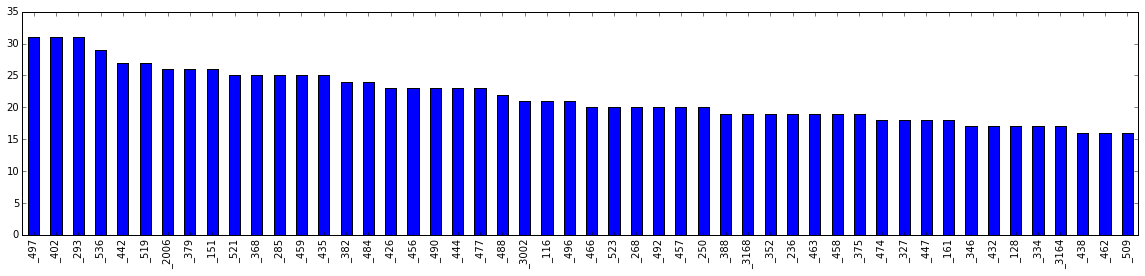

In [69]:
# Needed to change the graph code slightly since hour_change is now a pandas series (as opposed to a dict)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
hour_change[:50].plot(kind='bar')